훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)
원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)
     weight
38   4209.0
172  2223.0
277  3410.0
196  2164.0
357  2615.0
..      ...
375  1980.0
322  2110.0
15   2833.0
127  2901.0
267  2560.0

[274 rows x 1 columns]
[[1.0000000e+00 4.2090000e+03 1.7715681e+07]
 [1.0000000e+00 2.2230000e+03 4.9417290e+06]
 [1.0000000e+00 3.4100000e+03 1.1628100e+07]
 [1.0000000e+00 2.1640000e+03 4.6828960e+06]
 [1.0000000e+00 2.6150000e+03 6.8382250e+06]
 [1.0000000e+00 2.3850000e+03 5.6882250e+06]
 [1.0000000e+00 2.7950000e+03 7.8120250e+06]
 [1.0000000e+00 3.2450000e+03 1.0530025e+07]
 [1.0000000e+00 3.1020000e+03 9.6224040e+06]
 [1.0000000e+00 2.5060000e+03 6.2800360e+06]
 [1.0000000e+00 3.5700000e+03 1.2744900e+07]
 [1.0000000e+00 1.9400000e+03 3.7636000e+06]
 [1.0000000e+00 2.9900000e+03 8.9401000e+06]
 [1.0000000e+00 2.0850000e+03 4.3472250e+06]
 [1.0000000e+00 2.8550000e+03 8.1510250e+06]
 [1.0000000e+00 3.2880000e+03 1.0810944e+07]
 [1.0000000e+00 2.1250000e+03 4.51562

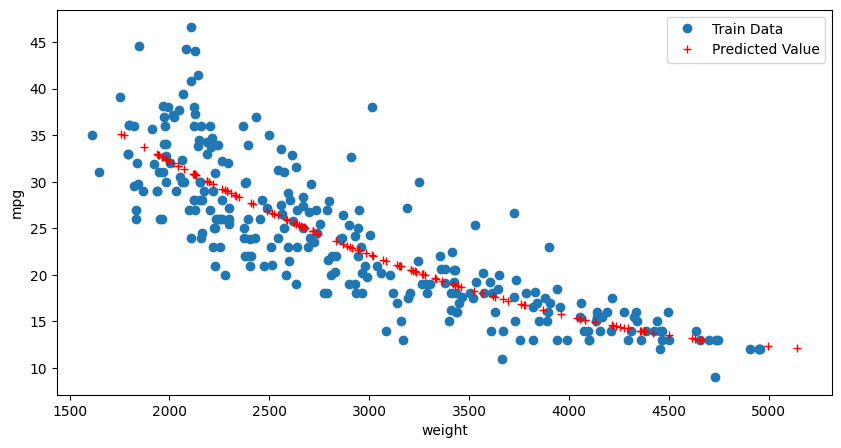

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

df['horsepower'].replace('?', np.nan, inplace=True)         # ? -> np.nan
df.dropna(subset=['horsepower'], axis=0, inplace=True)      # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float')         # 문자열을 실수형으로 변환

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
X = ndf[['weight']]
Y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)   # 독립변수, 종속변수, 검증 30%, 랜덤 추출값

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

from sklearn.linear_model import LinearRegression           # 선형 회귀 분석
from sklearn.preprocessing import PolynomialFeatures        # 다항식 변환

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

print('원 데이터: ', X_train.shape)
print("2차항 변환 데이터: ", X_train_poly.shape)
print(X_train)
print(X_train_poly)

pr = LinearRegression()
pr.fit(X_train_poly, Y_train)
X_test_poly = poly.fit_transform(X_test)
y_hat_test = pr.predict(X_test_poly)

y_comp2 = pd.DataFrame({'y':Y_test, 'y_hat':y_hat_test})
print(y_comp2)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, Y_train, 'o', label='Train Data')
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

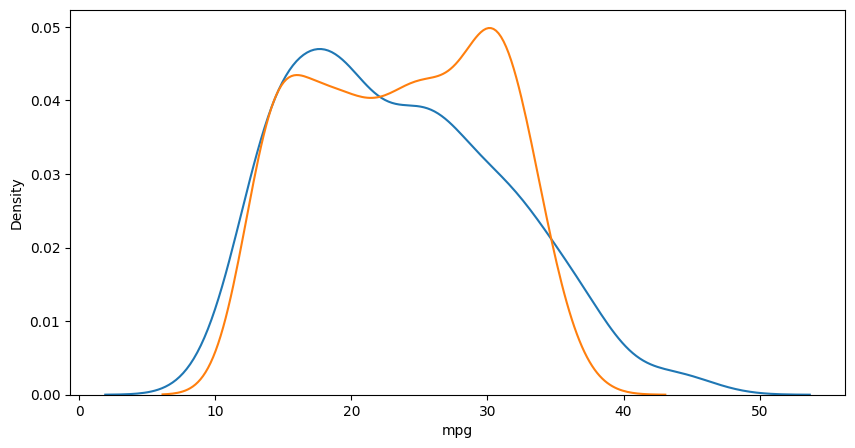

In [14]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(Y, label="Y")
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.show()

In [15]:
import sklearn.metrics as sm

print(sm.mean_squared_error(Y_test, y_hat_test))
print(sm.mean_absolute_error(Y_test, y_hat_test))

16.492381161410766
2.8536020901976347
